## Titanic Data Analytics

In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from scipy import stats
from collections import Counter

##Explore what is in the dataset
titanic_db = pd.DataFrame.from_csv('titanic_data.csv')
print titanic_db.columns.values.tolist()


['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


**Exploring the distribution of Ages in the Data set**

The mean age in the data is 29.6991176471

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AB04070>]], dtype=object)

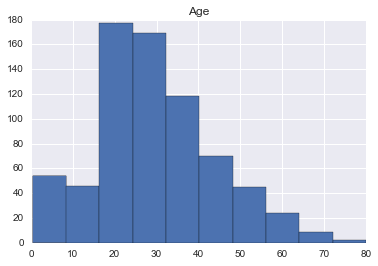

In [6]:
#What is the mean age in the data set
mean_age = titanic_db['Age'].mean()
print 'The mean age in the data is %s' % (mean_age)
print ''
#Find the 5 figure summary for the age distribution 
print titanic_db['Age'].describe()
print ''
#Plot the histogram of the Ages
%pylab inline
titanic_db.hist(column='Age')

**If we break apart the data at the rounded up mean of 30 years old,is there a signifigant difference in survival between the younger than 30 group and the total population?**

In [7]:
#Figure out how many NA's there are in the data
NAfilled = titanic_db.fillna(value='NA')
print Counter(NAfilled['Age'])
print ''
#Remove the 177 NA's in Age column
titanic_db_NA_removed = titanic_db[np.isfinite(titanic_db['Age'])]

#Seperate the data between the less than 30 and the 30 and above
Age_less_than_30 = titanic_db_NA_removed.loc[titanic_db_NA_removed['Age'] < 30]
Age_30_and_above = titanic_db_NA_removed.loc[titanic_db_NA_removed['Age'] >= 30]



#Check for errors and Check that that the data is not being lost in the seperation
for Age in Age_30_and_above['Age']:
    if Age>=30:
        'correct'
    else:
        print 'indexing incorrectly'

for Age in Age_less_than_30['Age']:
    if Age<30:
        'correct'
    else:
        print 'indexing incorrectly'
        
Size_less_than_30 = len(Age_less_than_30)
Size_above_30 = len(Age_30_and_above)
Total_seperated_size = len(Age_30_and_above)+len(Age_less_than_30)
Size_original = len(titanic_db_NA_removed)

if Size_original == Total_seperated_size:
    'correct'
else:
    print 'data seperated incorrectly'

    
    
#Total Survival data analysis       
Total_survived = sum(titanic_db_NA_removed['Survived']) 
Total_died = len(titanic_db_NA_removed)-Total_survived
Total_amount_of_people = len(titanic_db_NA_removed)
Total_percent_survived = Total_survived/float(Total_amount_of_people)*100
print 'The number of survivors is %s' % (Total_survived)
print 'The number dead is %s' % (Total_died)
print 'The percentage of survivors is %s' % (Total_percent_survived)
print ' '


#Less than 30 Survival data analysis 
Survived_less_than_30 = sum(Age_less_than_30['Survived'])
Died_less_than_30 = len(Age_less_than_30)-Survived_less_than_30
Total_less_than_30 = (Survived_less_than_30+Died_less_than_30)
Percent_survived_less_than_30 = Survived_less_than_30/float(Total_less_than_30)*100
print 'The number of survivors less than 30 years of age is %s' % (Survived_less_than_30)
print 'The number dead less than 30 years of age is %s' % (Died_less_than_30)
print 'The percentage of survivors less than 30 years of age is %s' % (Percent_survived_less_than_30)
print ' '



#30 and above Survival data analysis
Survived_30_and_above = sum(Age_30_and_above['Survived'])
Died_30_and_above = len(Age_30_and_above)-Survived_30_and_above
Total_30_and_above = len(Age_30_and_above)
Percent_survived_30_and_above = Survived_30_and_above/float(Total_30_and_above)*100

print 'The number of survivors of age 30 and above is %s' % (Survived_30_and_above)
print 'The number dead of age 30 and above is %s' % (Died_30_and_above)
print 'The percentage of survivors of age 30 and above is %s' % (Percent_survived_30_and_above)
print ''


#statistical analysis of If we break apart the data at the rounded up mean of 30 years old, 
#is there a signifigant difference in survival between the younger than 30 group and the total population?


survivors = np.array([[Survived_less_than_30,Died_less_than_30], [Total_survived, Total_died]])
chi2, p, dof, expected = stats.chi2_contingency(survivors)
print expected
print 'The p-value of the chi-squared test is %s' % (p)

Counter({'NA': 177, 24.0: 30, 22.0: 27, 18.0: 26, 19.0: 25, 28.0: 25, 30.0: 25, 21.0: 24, 25.0: 23, 36.0: 22, 29.0: 20, 26.0: 18, 27.0: 18, 32.0: 18, 35.0: 18, 16.0: 17, 31.0: 17, 20.0: 15, 23.0: 15, 33.0: 15, 34.0: 15, 39.0: 14, 17.0: 13, 40.0: 13, 42.0: 13, 45.0: 12, 38.0: 11, 2.0: 10, 4.0: 10, 50.0: 10, 44.0: 9, 47.0: 9, 48.0: 9, 9.0: 8, 54.0: 8, 1.0: 7, 51.0: 7, 3.0: 6, 14.0: 6, 37.0: 6, 49.0: 6, 52.0: 6, 41.0: 6, 15.0: 5, 43.0: 5, 58.0: 5, 5.0: 4, 8.0: 4, 11.0: 4, 56.0: 4, 60.0: 4, 62.0: 4, 7.0: 3, 46.0: 3, 61.0: 3, 65.0: 3, 6.0: 3, 28.5: 2, 10.0: 2, 13.0: 2, 55.0: 2, 57.0: 2, 59.0: 2, 63.0: 2, 64.0: 2, 70.0: 2, 71.0: 2, 30.5: 2, 0.75: 2, 0.83: 2, 45.5: 2, 40.5: 2, 32.5: 2, 14.5: 1, 70.5: 1, 12.0: 1, 0.92: 1, 53.0: 1, 66.0: 1, 74.0: 1, 80.0: 1, 55.5: 1, 36.5: 1, 23.5: 1, 0.42: 1, 20.5: 1, 34.5: 1, 0.67: 1, 24.5: 1})

The number of survivors is 290
The number dead is 424
The percentage of survivors is 40.6162464986
 
The number of survivors less than 30 years of age is 156
The numb

**In women, do titles that indicate marriage vs. total female population have a better survival rate?**

In [11]:
#Extract the Title from the name
def Extract_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'None'

#New data frame variable to work off of for this analysis 
Name_data = titanic_db

#Create new data frame with titles
titles = pd.DataFrame()
for name in Name_data['Name']:
    title = Extract_title(name)
    titles.set_value(name,'Title', title)
    titles.set_value(name,'Name', name)
    
#Merge the title column with the Name_data
Merged_name_data = Name_data.merge(titles)
print Counter(Merged_name_data['Title'])
print ''

#According to counter, the Titles for women are Miss, Mrs, Ms, the countess, lady
#Count the number of survivors vs. dead for those women with the titles of Mrs/Countess/Lady
Mrs_Countess_Lady = Merged_name_data[Merged_name_data['Title'].isin(['Mrs', 'Lady', 'the Countess'])]

#Calculate the number of females with the title Mrs_Countess_Lady
Mrs_Countess_Lady_total = len(Mrs_Countess_Lady)
print ''
print 'There are a total of %s females with the title Mrs, Lady, and Countess' % (Mrs_Countess_Lady_total)

#Calculate the number of women who survived with the titles Mrs_Countess_Lady
Survived_Mrs_Countess_Lady = sum(Mrs_Countess_Lady['Survived'])
Died_Mrs_Countess_Lady = Mrs_Countess_Lady_total - Survived_Mrs_Countess_Lady
Percent_survived_Mrs_Countess_Lady = (Survived_Mrs_Countess_Lady/float(Mrs_Countess_Lady_total))*100
print 'With the title of Mrs_Countess_Lady, %s people in the dataset surived, which is %s percent of that group of women' % (Survived_Mrs_Countess_Lady, Percent_survived_Mrs_Countess_Lady)
print ''

##Survived all females
female_subset = titanic_db_NA_removed.loc[titanic_db_NA_removed['Sex']=='female']
females_count = len(female_subset)
females_survived = sum(female_subset['Survived'])
females_died = females_count-females_survived
Percent_survived_females = (females_survived/float(females_count))*100
print '%s females in the dataset surived, which is %s percent of the group of women' % (females_survived, Percent_survived_females)
print ''

##Chi squared testing between all females and females with the title Mrs_Countess_Lady
survivors = np.array([[Survived_Mrs_Countess_Lady, Died_Mrs_Countess_Lady], [females_survived, females_died]])
chi2, p, dof, expected = stats.chi2_contingency(survivors)
print expected
print 'The p-value of the chi-squared test is %s' % (p)

Counter({'Mr': 517, 'Miss': 182, 'Mrs': 125, 'Master': 40, 'Dr': 7, 'Rev': 6, 'Major': 2, 'Mlle': 2, 'Col': 2, 'Sir': 1, 'the Countess': 1, 'Don': 1, 'Capt': 1, 'Lady': 1, 'Jonkheer': 1, 'Ms': 1, 'Mme': 1})


There are a total of 127 females with the title Mrs, Lady, and Countess
With the title of Mrs_Countess_Lady, 101 people in the dataset surived, which is 79.5275590551 percent of that group of women

197 females in the dataset surived, which is 75.4789272031 percent of the group of women

[[  97.54123711   29.45876289]
 [ 200.45876289   60.54123711]]
The p-value of the chi-squared test is 0.448203274794


Populating the interactive namespace from numpy and matplotlib


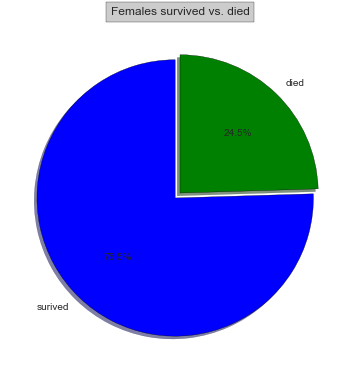

In [46]:

##pie graph for all women survived vs. died
%pylab inline
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])
labels = 'surived', 'died'
fracs = [Percent_survived_females, (100-Percent_survived_females)]
explode=(0.05, 0)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Females survived vs. died', bbox={'facecolor':'0.8', 'pad':5})


Populating the interactive namespace from numpy and matplotlib


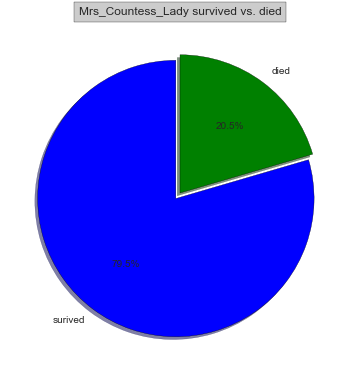

In [47]:
##pie graph for women with title Mrs_Countess_Lady survived vs. died
%pylab inline
figure(2, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])
labels2 = 'surived', 'died'
fracs2 = [Percent_survived_Mrs_Countess_Lady, (100-Percent_survived_Mrs_Countess_Lady)]
explode2=(0.05, 0)

pie(fracs2, explode=explode2, labels=labels2,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Mrs_Countess_Lady survived vs. died', bbox={'facecolor':'0.8', 'pad':5})

<h1>**Data Prep**</h1>
<ul>
<br><li>**For the analysis of the survival rate of age groups**</li>
<ul><li>There were 177 NA's to remove. I chose to remove those because it would skew my statistical analysis if I set those entries to 0.</li></br>
<li>I seperated the data into 2 parts to conduct the anlaysis. It was seperated by the mean age which was 29.7, I rounded up to 30 and included 30 in the older subset of the data.
</ul>
<li>**For the analysis of female titles and their survival rate**</li><ul>
<li>I created a new data frame called title. In this data frame, I included the names from the titanic dataset and extracted their formal titles (i.e. Mr, Miss, Mrs, etc.)</li>
<li>I merged this new data frame with the origional titanic data frame in order to create a new row with people's titles.</li>
<li>For those that have no title included, the title column would reflect None</li>
<li>I then extracted the titles that included Mrs, Lady, and Countess to create a data subset. All of these titles indicate that the woman was most likely married. </li>
<li>I also created a subset of the data that included only women.
</ul>
</ul>
<h1><br>**Conclusion of Analysis**<br></h1>
<br><h3>**Analysis of the question: If we break apart the data at the rounded up mean of 30 years old,is there a signifigant difference in survival between the younger than 30 group and the total population?**</h3></br>
<br>From the histogram plot of the age distribution, we can see that the data is skewed and that there are more in the younger side of the distribution curve. The mean age also reflects the skewed distribution as it is much lower than the mid point of the min (0.42) and maximum (80.0) at 29.7. </br>
<br>As mentioned in the data prep section, I divided the data into two age groups, below 30 and 30 and above. I calculated in both groups: the total people in each age group, the total that survived, the total that died, and the percentage of survival.</br>
<br>I then wanted to know if the younger group (under 30) had a larger percentage of survival than the total population. I calculated a p-value to try and quanify if there was a signifigant difference between survival rate for all ages vs. the under 30. I used chi squared test to evaluate this. 
<br>Using this test, I got a p-value of 0.95. This value is very high. This result makes sense as there is a very small difference in percentages. The percentage that survived in the overall dataset is 40.616%. The percentage that survived in the under 30 group is 40.625%.</br>
<br></br>
<br>Null Hypothesis: Ages under 30 and total population Survival are independent.</br>
<br>Alternate Hypothesis: Ages under 30 and total population Survival are not independent</sub></br>
<br>Want to analyze with 95% confidence</br>
<br>I used chi-squared test to determine if there is a signifigant difference in survival between the overall data and the under 30 years of age data.</br>
<br>We found the p-value to be 0.9509 which is very high and much greater than 0.05. Therefore, we should not reject the null hypothesis. There is **not** strong evidence that there is a difference in the proportion of survivors between the total data and the people under 30 through this test.</br>
<br></br>
<br><h3>**Analysis of the question: In women, do titles that indicate marriage vs. total female population have a better survival rate?
**</h3></br>
<br>For this analysis, I created two datasets. The first data set contained only women with Mrs, lady, or countess in their title. The second, was a subset of the data containing only females. </br>
<br>Similar to the age analysis, I wanted to know if there was a signifigant difference between all the women in the data set's survival rate and the women with the titles Mrs, Lady, and Countess. I used chi squared test to evaluate this</br>
<br>Using this test, I got a p-value of 0.448. This p-value does not show a signifigant difference in survival rate between the two groups. The percentage that survived in the overall female dataset is 75.5%. The percentage that survived in the Mrs, Lady, Countess group is 79.5%. The pie charts also help to show this. There is a 4% difference in survival rate between the two groups.</br>
<br></br>
<br>Null Hypothesis:  Female titles indicating marriage (Mrs, Lady, Countess) and female survival are independent. </br>
<br>Alternate Hypothesis: Female titles indicating marriage (Mrs, Lady, Countess) and female survival are not independent. </br>
<br>Want to analysis with 95% confidence</br>
<br>Using chi-squared test to determine if there is a signifigant difference in survival between the overall female data and the Mrs, lady, countess data.</br>
<br>We found the p-value to be 0.448 which is much greater than 0.05. Therefore, we should not reject the null hypothesis. Through this test, there is **not** strong evidence that there is a dependence between survival rate of the total female data and the Mrs, lady, countess data.</br>


<br><h3>Sources used:</h3></br>
<ul><li>stackoverflow.com</li>
<li>documentation from matplotlib,pandas, numpy, scipy, collections</li>
